<a href="https://colab.research.google.com/github/belanurseptia/CustSegmentation-FinalProject/blob/main/FinalProject_Marketing_Bella_Nurseptia_DBA2221650.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**<h1 align=center><font size = 5>Final Project - Department Marketing - Kelompok 226</font></h1>**

## Overview


**Kelompok 226**

Nama   : Bella Nurseptia

IDCAMP : DBA2221650

Mentor : Fio Faberio

Pada department marketing ini, kami akan mencoba menentukan strategi pemasaran paling optimal untuk perusahaan Thelook, dengan cara mengenal customer Thelook menggunakan metode customer segmentation. segmentation customer ini merupakan langkah yang dilakukan untuk membagi pelanggan menjadi beberapa segmen atau grup berdasarkan kualitas dan personalitas pelanggan secara umum, misalnya berdasarkan demografis, geografis, behavior ataupun psikografis. Kali ini kami akan mencoba melakukan customer segmentation menggunakan model clustering dengan algoritma K-Means untuk melihat dan mengelompokan customer Thelook yang memiliki kemiripan dalam hal bertransaksi.


## Load & Data Understanding

In [2]:
# Import Library
import numpy as np # Untuk Mengolah Angka (Menghitung log, Menghitung Jarak, Menghitung abs, dll)
import pandas as pd # Untuk Mengolah Data (Import Data, Manipulasi Data, dll)
import matplotlib.pyplot as plt # Untuk Visualisasi
import seaborn as sns # Untuk Visualisasi
import matplotlib as matplot
import plotly.graph_objs as go

from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.metrics import silhouette_score
from plotly.subplots import make_subplots

%matplotlib inline

In [3]:
#mounting data dari gdrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#import data_transaction2.csv
df = pd.read_csv('/content/drive/MyDrive/ruang guru/Final Project/Marketing_Transaksi_DBA2221650.csv')
df

,user_id,age,gender,country,longitude,latitude,order_id,product_id,created_at,sale_price
0,1,30,M,South Korea,127.197980,37.702753,2,27061,2021-11-30,42.00
1,1,30,M,South Korea,127.197980,37.702753,1,21357,2019-07-21,68.95
2,1,30,M,South Korea,127.197980,37.702753,1,26458,2019-07-20,11.99
3,1,30,M,South Korea,127.197980,37.702753,1,27726,2019-07-19,49.99
4,1,30,M,South Korea,127.197980,37.702753,4,22984,2020-02-10,30.00
...,...,...,...,...,...,...,...,...,...,...
180503,99997,50,F,United States,-116.613811,43.495670,124508,15264,2020-07-02,8.99
180504,99998,63,F,South Korea,127.058021,37.622171,124509,5583,2022-02-01,44.00
180505,99999,43,M,China,111.745029,40.898932,124510,17518,2022-05-10,75.00
180506,100000,65,M,Brasil,-44.706126,-23.149086,124512,20039,2021-06-08,49.88


In [5]:
#menampilkan 10 data teratas
df.head(10)

,user_id,age,gender,country,longitude,latitude,order_id,product_id,created_at,sale_price
0,1,30,M,South Korea,127.197980,37.702753,2,27061,2021-11-30,42.00
1,1,30,M,South Korea,127.197980,37.702753,1,21357,2019-07-21,68.95
2,1,30,M,South Korea,127.197980,37.702753,1,26458,2019-07-20,11.99
3,1,30,M,South Korea,127.197980,37.702753,1,27726,2019-07-19,49.99
4,1,30,M,South Korea,127.197980,37.702753,4,22984,2020-02-10,30.00
5,1,30,M,South Korea,127.197980,37.702753,4,27828,2020-02-10,47.04
6,1,30,M,South Korea,127.197980,37.702753,1,16783,2019-07-20,55.00
7,1,30,M,South Korea,127.197980,37.702753,3,28048,2022-05-14,47.99
8,3,48,M,China,119.348258,32.361035,5,19955,2021-09-07,19.99
9,3,48,M,China,119.348258,32.361035,6,18499,2021-07-31,13.00


In [6]:
#melihat tipe data dari tiap variabel
df.dtypes

user_id         int64
age             int64
gender         object
country        object
longitude     float64
latitude      float64
order_id        int64
product_id      int64
created_at     object
sale_price    float64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180508 entries, 0 to 180507
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     180508 non-null  int64  
 1   age         180508 non-null  int64  
 2   gender      180508 non-null  object 
 3   country     180508 non-null  object 
 4   longitude   180508 non-null  float64
 5   latitude    180508 non-null  float64
 6   order_id    180508 non-null  int64  
 7   product_id  180508 non-null  int64  
 8   created_at  180508 non-null  object 
 9   sale_price  180508 non-null  float64
dtypes: float64(3), int64(4), object(3)
memory usage: 13.8+ MB


> **Insights:**

* Dataset transaksi ini memiliki 180508 baris dan 9 kolom data
* Dan tidak terdapat Missing Value

In [8]:
#melihat unique value yang ada pada setiap variabel
df.nunique()

user_id        79986
age               59
gender             2
country           15
longitude      15680
latitude       15724
order_id      124512
product_id     29050
created_at      1237
sale_price      4187
dtype: int64

In [9]:
#melihat kalkulasi statistika dari tiap variabel
df.describe()

,user_id,age,longitude,latitude,order_id,product_id,sale_price
count,180508.000000,180508.000000,180508.000000,180508.000000,180508.000000,180508.000000,180508.000000
mean,50171.351602,41.098350,25.198161,28.234888,62408.024420,15290.370105,59.799867
std,28839.688216,17.000744,89.717973,22.167794,35991.857094,8405.434843,65.844662
min,1.000000,12.000000,-158.164931,-43.160756,1.000000,1.000000,0.020000
25%,25249.750000,26.000000,-50.283002,26.083985,31249.750000,8050.000000,24.900000
50%,50273.000000,41.000000,4.754982,35.202131,62520.000000,16029.000000,39.990000
75%,75175.000000,56.000000,116.407574,40.722683,93647.000000,22547.000000,69.950000
max,100000.000000,70.000000,153.533010,64.865194,124512.000000,29120.000000,999.000000


> **Insights:**

* Rata rata usia pelanggan Thelook adalah 41 tahun, dengan usia termuda adalah 12 tahun dan tertua adalah 70 tahun

## Exploratory Data Analytics

###1 Data Preparation (Missing Values)

In [10]:
# Memeriksa apakah ada data yang null atau kosong
df.isnull().any()

user_id       False
age           False
gender        False
country       False
longitude     False
latitude      False
order_id      False
product_id    False
created_at    False
sale_price    False
dtype: bool

In [11]:
df.isnull().sum()

user_id       0
age           0
gender        0
country       0
longitude     0
latitude      0
order_id      0
product_id    0
created_at    0
sale_price    0
dtype: int64

> **Insights:**

Terlihat bahwa data transaksi diatas tidak memiliki missing value, selain itu tipe data antar variabel sudah sesuai karna beberapa diantaranya sudah diubah di SQL, maka dari itu kita dapat melanjutkan ke data visualisasi

### 2 Visualitation

Karena dataset yang kita punya merupakan data setiap transaksi yang dilakukan pelanggan, maka untuk melakukan EDA pada user kita harus melakukan group by tiap user

In [12]:
cust_data=df[['user_id','country','age','gender']].drop_duplicates()
cust_data.groupby(['user_id'])['country'].aggregate('count').reset_index().sort_values('user_id', ascending=True)
cust_data

,user_id,country,age,gender
0,1,South Korea,30,M
8,3,China,48,M
10,4,China,16,M
12,5,China,14,M
16,6,China,13,M
...,...,...,...,...
180499,99996,China,31,M
180501,99997,United States,50,F
180504,99998,South Korea,63,F
180505,99999,China,43,M


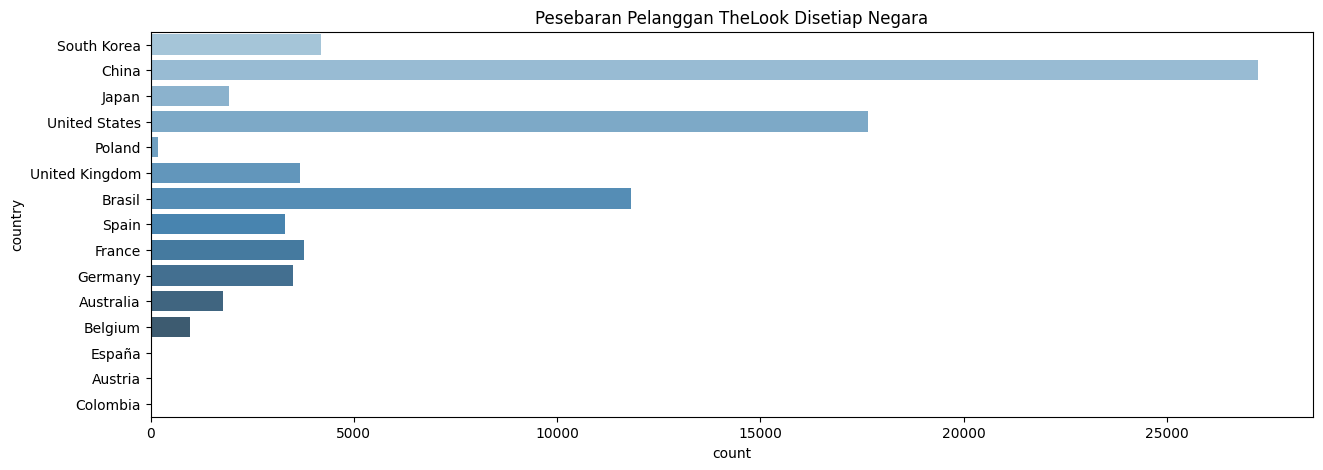

In [13]:
fig, ax = plt.subplots(figsize =(15, 5))
sns.countplot(y = 'country' , data = cust_data, palette="Blues_d")
ax.set_title('Pesebaran Pelanggan TheLook Disetiap Negara',
             loc ='center', )
plt.show()

> **Insights:**

pelanggan TheLook paling banyak berasal dari negara China, United States, dan Brasil

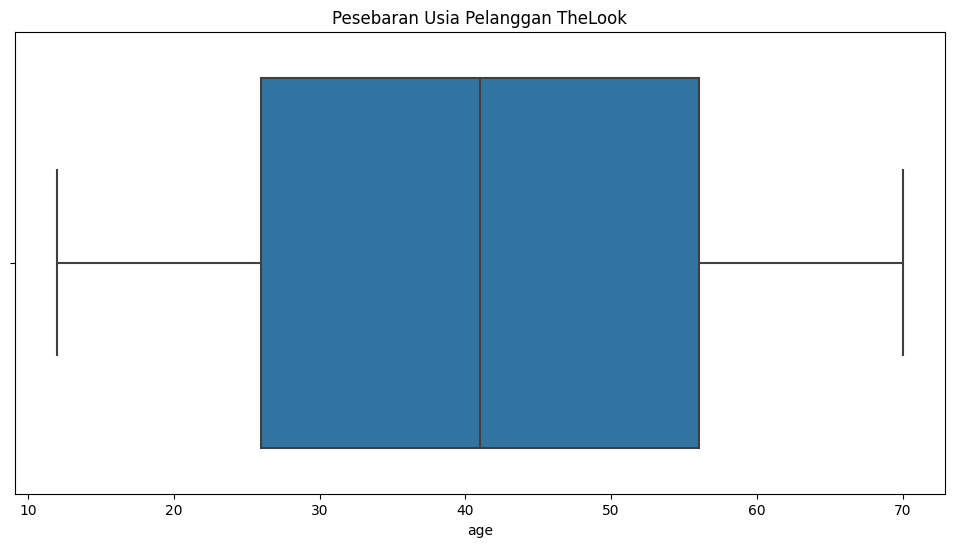

In [14]:
fig, ax = plt.subplots(figsize =(12, 6))
sns.boxplot(x="age", data=cust_data)
ax.set_title('Pesebaran Usia Pelanggan TheLook',
             loc ='center', )
plt.show()

> **Insights:**

Rata rata pelanggan TheLook berusia 40 tahun, dapat dilihat pada boxplot usia termuda sekitar usia 12 tahun dan tertua usia 70 tahun

In [15]:
gender_cust_data=df[['gender','user_id']].drop_duplicates()
gender_cust_data.groupby(['gender'])['user_id'].aggregate('count').reset_index().sort_values('user_id', ascending=False)

,gender,user_id
0,F,40056
1,M,39930


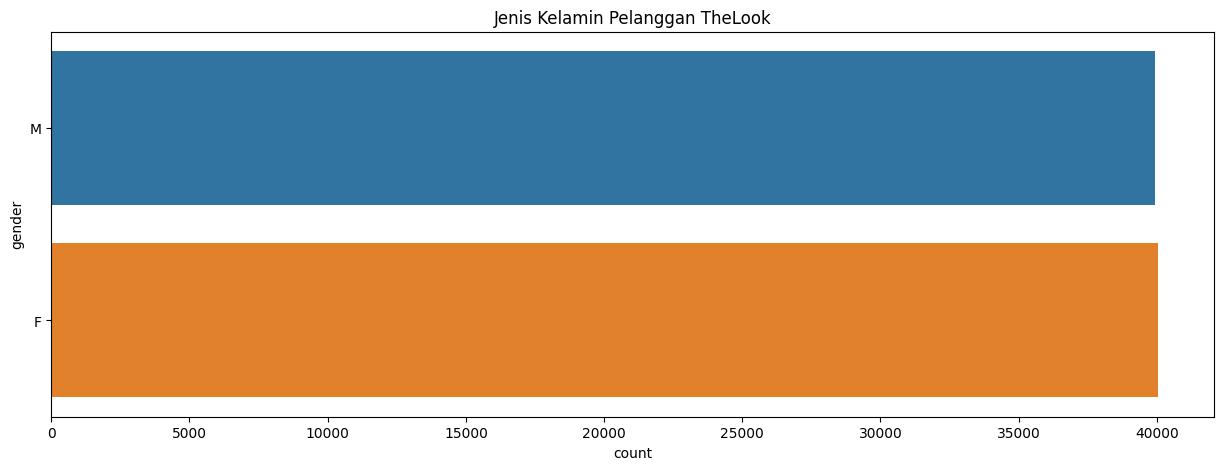

In [16]:
fig, ax = plt.subplots(figsize =(15, 5))
ax.set_title('Jenis Kelamin Pelanggan TheLook',
             loc ='center', )
sns.countplot(y = 'gender' , data = gender_cust_data)
plt.show()

> **Insights:**

Jenis kelamin pelanggan TheLook dapat dikatakan imbang antara perempuan (F) dan laki laki (L)

<ipython-input-17-6522c2b4e5f9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


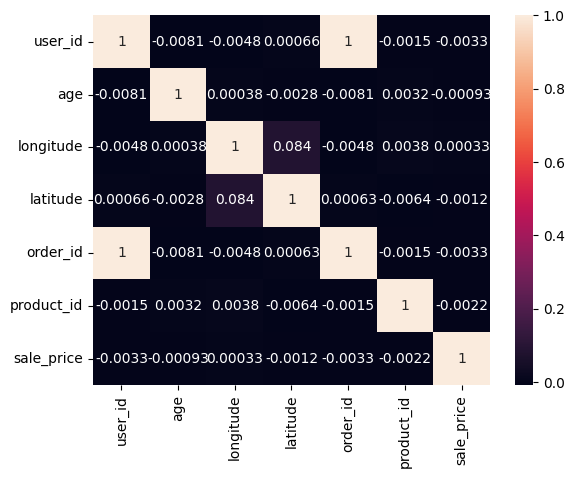

In [17]:
sns.heatmap(df.corr(), annot=True)
plt.show()

### 3 Data Transformation

Untuk mendapatkan lebih banyak insight saya akan melakukan transformasi data yaitu membuat kolom:

*   frekuensi lama waktu transaksi tiap user (recency)
*   total transaksi tiap user (total_order)
*   total pengeluran tiap user (spend_money)

Dengan tambahan variabel baru kita dapat melihat behavior dari tiap customer dalam melakukan transaksi.


In [18]:
df2 = df.copy()
df2

,user_id,age,gender,country,longitude,latitude,order_id,product_id,created_at,sale_price
0,1,30,M,South Korea,127.197980,37.702753,2,27061,2021-11-30,42.00
1,1,30,M,South Korea,127.197980,37.702753,1,21357,2019-07-21,68.95
2,1,30,M,South Korea,127.197980,37.702753,1,26458,2019-07-20,11.99
3,1,30,M,South Korea,127.197980,37.702753,1,27726,2019-07-19,49.99
4,1,30,M,South Korea,127.197980,37.702753,4,22984,2020-02-10,30.00
...,...,...,...,...,...,...,...,...,...,...
180503,99997,50,F,United States,-116.613811,43.495670,124508,15264,2020-07-02,8.99
180504,99998,63,F,South Korea,127.058021,37.622171,124509,5583,2022-02-01,44.00
180505,99999,43,M,China,111.745029,40.898932,124510,17518,2022-05-10,75.00
180506,100000,65,M,Brasil,-44.706126,-23.149086,124512,20039,2021-06-08,49.88


Membuat fitur recency untuk melihat kapan terakhir pelanggan bertransaksi di aplikasi ecommerce TheLook

In [19]:
df2['created_at'].max()

'2022-06-06'

In [20]:
# make sure that none of the Recency values become zero
import datetime as dt
today_date = dt.datetime(2022, 6, 20)

In [21]:
df2['created_at'] = pd.to_datetime(df2['created_at'])

In [22]:
df2["user_id"] = df2["user_id"].astype(int)
recency_df = (today_date - df2.groupby("user_id").agg({"created_at":"max"}))
recency_df

,created_at
user_id,
1,37 days
3,286 days
4,224 days
5,32 days
6,175 days
...,...
99996,453 days
99997,718 days
99998,139 days


In [23]:
recency = pd.DataFrame(recency_df['created_at'].astype('timedelta64[D]'))
recency.columns = ['recency']
recency

,recency
user_id,
1,37.0
3,286.0
4,224.0
5,32.0
6,175.0
...,...
99996,453.0
99997,718.0
99998,139.0


Membuat fitur `total_order` untuk melihat berapa banyak transaksi yang telah dilakukan tiap user

In [24]:
df2.drop_duplicates(subset=['order_id', 'user_id'], keep="first", inplace=True)
#calculate frequency of purchases
total_order = df2.groupby(by=['user_id'], as_index=False)['order_id'].count()
total_order.columns = ['user_id','total_order']
total_order

,user_id,total_order
0,1,4
1,3,2
2,4,1
3,5,1
4,6,1
...,...,...
79981,99996,1
79982,99997,2
79983,99998,1
79984,99999,1


Membuat fitur `spend_money` untuk mengetahui banyak nya uang yang telah dihabiskan setiap pelanggan di TheLook

In [25]:
spend_money = df2.groupby(by='user_id',as_index=False).agg({'sale_price': 'sum'})
spend_money.columns = ['user_id','spend_money']
spend_money

,user_id,spend_money
0,1,188.94
1,3,32.99
2,4,41.80
3,5,27.95
4,6,64.90
...,...,...
79981,99996,19.99
79982,99997,33.99
79983,99998,44.00
79984,99999,75.00


MERGE DATA

In [26]:
merge1 = recency.merge(total_order,on='user_id')
merge1.head()

,user_id,recency,total_order
0,1,37.0,4
1,3,286.0,2
2,4,224.0,1
3,5,32.0,1
4,6,175.0,1


In [27]:
merge2 = merge1.merge(spend_money,on='user_id')
merge2.head()

,user_id,recency,total_order,spend_money
0,1,37.0,4,188.94
1,3,286.0,2,32.99
2,4,224.0,1,41.80
3,5,32.0,1,27.95
4,6,175.0,1,64.90


In [28]:
merge3 = merge2.merge(cust_data,on='user_id')
merge3.head()

,user_id,recency,total_order,spend_money,country,age,gender
0,1,37.0,4,188.94,South Korea,30,M
1,3,286.0,2,32.99,China,48,M
2,4,224.0,1,41.80,China,16,M
3,5,32.0,1,27.95,China,14,M
4,6,175.0,1,64.90,China,13,M


# Tambahan

Sub `Tambahan` ini merupakan sintaks yang saya gunakan untuk mendownload data yang telah dipreparation dan transformasi ke bentuk CSV untuk keperluan Checkpoint 5 (Visualisation With Tableau)

In [29]:
tambah=df[['user_id', 'longitude','latitude']].drop_duplicates()
tambah

,user_id,longitude,latitude
0,1,127.197980,37.702753
8,3,119.348258,32.361035
10,4,126.611892,43.849559
12,5,120.547091,31.854733
16,6,113.870366,22.989304
...,...,...,...
180499,99996,123.097625,41.239457
180501,99997,-116.613811,43.495670
180504,99998,127.058021,37.622171
180505,99999,111.745029,40.898932


In [30]:
merge4 = tambah.merge(merge3,on='user_id')
merge4.head()

,user_id,longitude,latitude,recency,total_order,spend_money,country,age,gender
0,1,127.197980,37.702753,37.0,4,188.94,South Korea,30,M
1,3,119.348258,32.361035,286.0,2,32.99,China,48,M
2,4,126.611892,43.849559,224.0,1,41.80,China,16,M
3,5,120.547091,31.854733,32.0,1,27.95,China,14,M
4,6,113.870366,22.989304,175.0,1,64.90,China,13,M


In [31]:
merge4.to_csv('DataTransaksiFix.csv')

In [32]:
from google.colab import files
merge4.to_csv('DataTransaksiFix.csv')
files.download('DataTransaksiFix.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Modell Clustering

<ipython-input-33-f15755102be9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(merge3.corr(), annot=True)


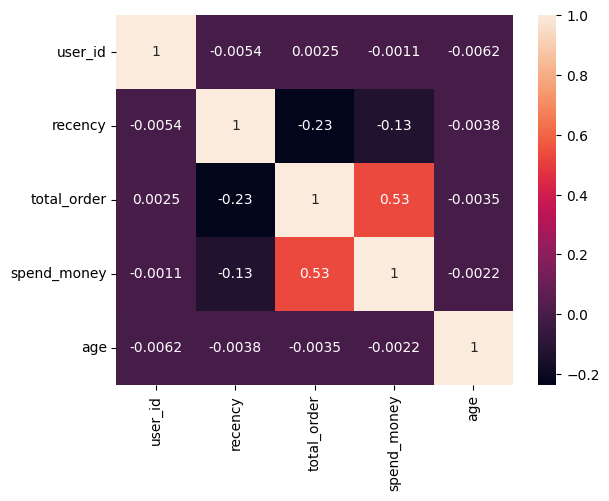

In [33]:
sns.heatmap(merge3.corr(), annot=True)
plt.show()

> **Insights:**

Dari variabel baru yang sudah dibuat (recency, total_order, spend_money) terlihat bahwa korelasi yang cukup besar adalah total_order dan spend_money, tetapi karna total order dari data yang kita miliki hanya memiliki unique value 4 saya mencoba untuk melakukan clustering benrdasarkan recency dan spend_money.

Pada analisa ini saya mencoba melakukan segmentasi berdasarkan kebiasaan pelanggan ketika bertransaksi yaitu recency(kapan atau berapa hari yang lalu terakhir pelanggan melakukan teransaksi) dan spend money (berapa besar uang yang dikeluarkan pelanggan di perusahaan TheLook)

##1 Data Preparation

Melakukan normalisasi pada data menggunakan MinMax

In [34]:
scaler = MinMaxScaler()

df_scaller = merge2.copy()
df_scaller[['recency', 'total_order', 'spend_money']] = scaler.fit_transform(df_scaller[['recency', 'total_order', 'spend_money']])
df_scaller

,user_id,recency,total_order,spend_money
0,1,0.018669,1.000000,0.137844
1,3,0.220779,0.333333,0.024056
2,4,0.170455,0.000000,0.030485
3,5,0.014610,0.000000,0.020379
4,6,0.130682,0.000000,0.047339
...,...,...,...,...
79981,99996,0.356331,0.000000,0.014571
79982,99997,0.571429,0.333333,0.024786
79983,99998,0.101461,0.000000,0.032090
79984,99999,0.021916,0.000000,0.054709


## 2 Elbow Method

Menentukan jumlah cluster dengan metode elbow

In [35]:
#recency and spend_money
X2 = df_scaller[['recency' , 'spend_money']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1373: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.
  warnings.warn(


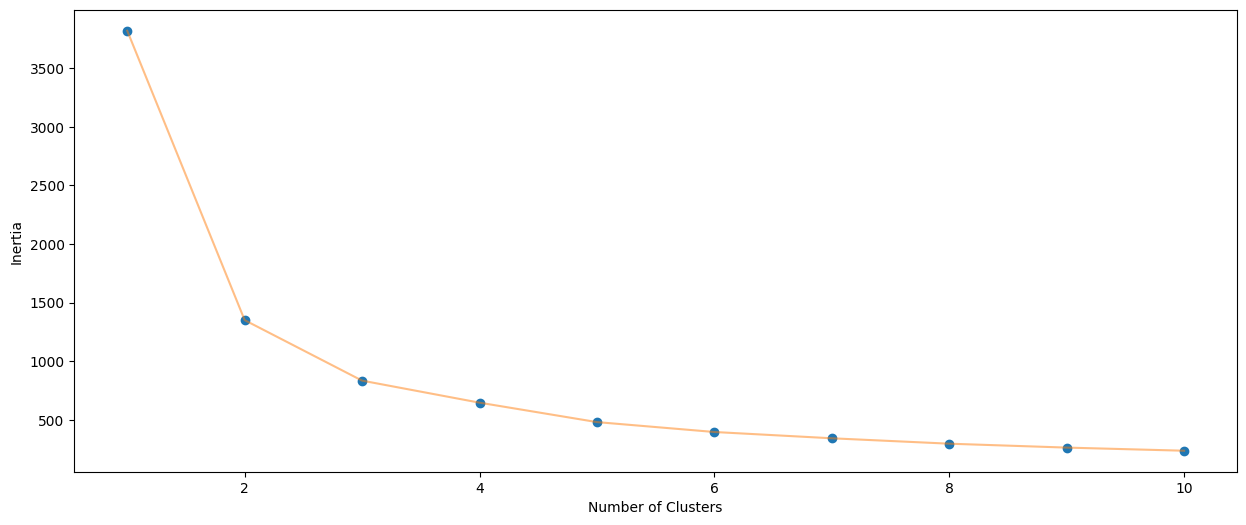

In [36]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

> **Insights:**

Berdasarkan grafik terlihat bahwa penurunan titik inertia yang tidak terlalu ekstrim terlihat pada titik 3-4, jadi cluster yang kita gunakan adalah 3 cluster

##3 K-Means

Karena data yang akan diclustering adalah data numerik jadi saya menggunakan algoritma K-Means untuk mengeksekusinya

In [37]:
modeling=df_scaller[["user_id","recency","total_order","spend_money"]]
X=df_scaller[["spend_money","recency"]]

In [51]:
#Taking 3 clusters
km3=KMeans(n_clusters=3)
km3.fit(X)
y=km3.predict(X)
modeling["label"] = y
modeling

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,user_id,recency,total_order,spend_money,label
0,1,0.018669,1.000000,0.137844,0
1,3,0.220779,0.333333,0.024056,1
2,4,0.170455,0.000000,0.030485,0
3,5,0.014610,0.000000,0.020379,0
4,6,0.130682,0.000000,0.047339,0
...,...,...,...,...,...
79981,99996,0.356331,0.000000,0.014571,1
79982,99997,0.571429,0.333333,0.024786,2
79983,99998,0.101461,0.000000,0.032090,0
79984,99999,0.021916,0.000000,0.054709,0


<Axes: xlabel='label', ylabel='count'>

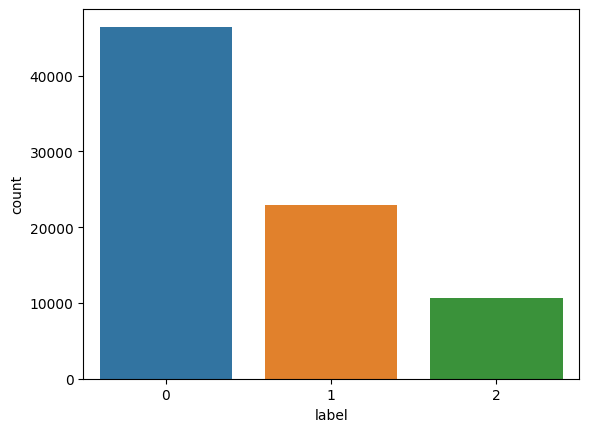

In [67]:
sns.countplot(x='label', data=modeling)

> **Insights:**

Berikut ini adalah banyaknya anggota dari tiap cluster

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-49-4f6f5abf2265>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Labels'] = km3.labels_


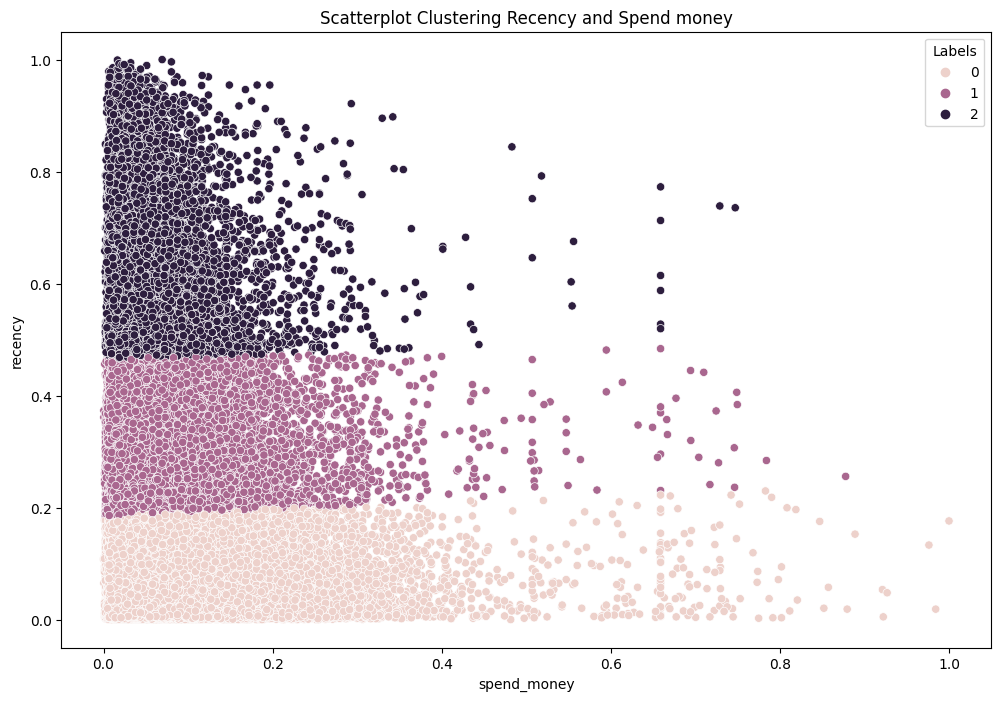

In [49]:
km3 = KMeans(n_clusters=3).fit(X)

X['Labels'] = km3.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X['spend_money'], y=X['recency'], hue=X['Labels'])
plt.title('Scatterplot Clustering Recency and Spend money')
plt.xlabel('spend_money')
plt.ylabel('recency')
plt.show()

> **Insights:**

Berikut ini adalah pesebaran data dari tiap cluster berdasarkan scatterplot. dari plot diatas dapat diambil kesimpulan bahwa:

*  Medium Value Cust (Pink)
Pelanggan yang belum lama mengunjungi platform (Sering mengunjungi) tetapi pengeluarannya tidak besar atau jarang melakukan transaksi

*  Low Value Cust (Ungu)
Pelanggan yang sudah lama tidak mengunjungi platform (jarang mengunjungi) dan jarang melakukan transaksi atau menghabiskan uang di The Look

*  High Value Cust (Hitam)
Pelanggan yang belum lama megunjungi platform(sering mengunjungi) dan sering berbelanja dan melakukan transaksi

[READ ME]

Terdapat perbedaan bentuk clustering pada python dan tableau, hal ini karena pada python saya menggunakan standard scaller untuk melakukan normalisasi, sedangkan pada tableau defaultnya menggunakan MinMax scaller untuk normalisasi data

#Evaluation

Tahap evaluasi digunakan untuk melihat seberapa optimal jumlah cluster yang kita gunakan pada model yang kita jalankan. disini saya menggunakan silhouette untuk melakukan evalusasi pada clustering data transaksi

## Silhouette

In [46]:
X3 = df_scaller[['recency' , 'spend_money']].iloc[: , :].values
silhouette_scores = []

# INFORMATION
# It may take a longer time to run, the sample data took around 46m 30s to be completed

for k in range(2, 10):
    model = KMeans(n_clusters=k, random_state=300)
    model.fit(X3)
    silhouette_scores.append(silhouette_score(df_scaller, model.labels_))

print("Done calculate silhouette scores for "+str(k)+" cluster")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Done calculate silhouette scores for 9 cluster


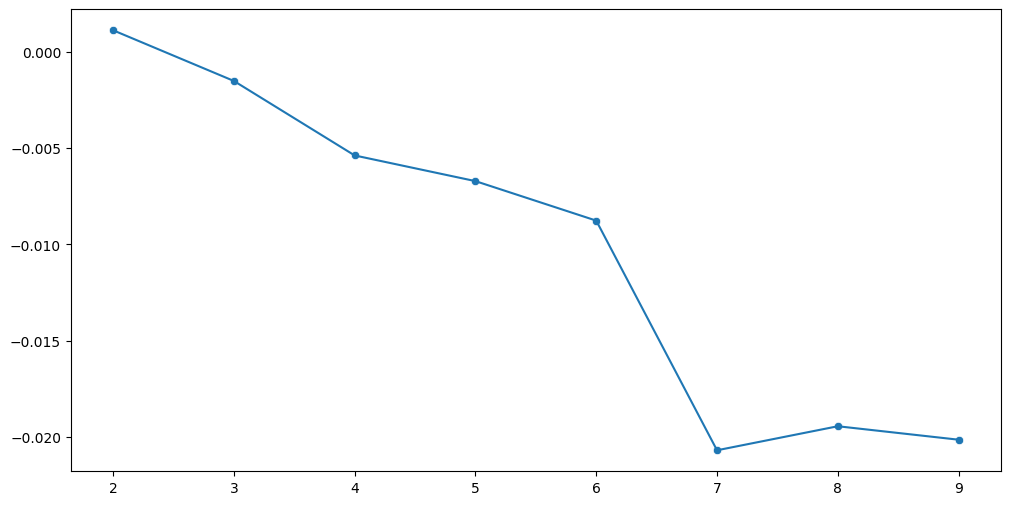

In [47]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=range(2, 10), y=silhouette_scores)
sns.scatterplot(x=range(2, 10), y=silhouette_scores)
plt.xticks(range(2, 10))
plt.show()

Dari grafik diatas terlihat bahwa titik yang paling tinggi an mendekasi 1 adalah cluster 3, dengan ini dapat dikatakan bahwa jumlah cluster 3 sudah optimal.